In [33]:
#Import the data 

import pandas as pd
import zipfile
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [34]:


# Define file paths
car_names_file = 'Car names and make.csv'
annotations_zip_file = 'Annotations.zip'
images_zip_file = 'Car Images.zip'

# Step 1: Load the car names and make data
car_names_df = pd.read_csv(car_names_file)

# Display the first few rows of the DataFrame
print("Car Names and Makes:")
print(car_names_df.head())

# Step 2: Extract Annotations.zip
with zipfile.ZipFile(annotations_zip_file, 'r') as zip_ref:
    zip_ref.extractall('Annotations')

# List the extracted files
print("\nExtracted Annotations:")
print(os.listdir('Annotations'))

# Step 3: Extract Car Images.zip
with zipfile.ZipFile(images_zip_file, 'r') as zip_ref:
    zip_ref.extractall('Car_Images')

# List the extracted files
print("\nExtracted Car Images:")
print(os.listdir('Car_Images'))

Car Names and Makes:
  AM General Hummer SUV 2000
0        Acura RL Sedan 2012
1        Acura TL Sedan 2012
2       Acura TL Type-S 2008
3       Acura TSX Sedan 2012
4  Acura Integra Type R 2001

Extracted Annotations:
['Annotations']

Extracted Car Images:
['Car Images']


In [9]:
# Load the training annotations
train_annotations_path = r'C:\Users\A373575\OneDrive - Volvo Group\Python Scripts\CAPSTONE\Annotations\Annotations\Train Annotations.csv'  # Adjust the path as necessary
train_annotations_df = pd.read_csv(train_annotations_path)

# Print the column names to diagnose the issue
print("Training Annotations Columns:")
print(train_annotations_df.columns)

Training Annotations Columns:
Index(['Image Name', 'Bounding Box coordinates', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Image class'],
      dtype='object')


In [12]:
test_annotations_path = r'C:\Users\A373575\OneDrive - Volvo Group\Python Scripts\CAPSTONE\Annotations\Annotations\Test Annotation.csv'  # Adjust the path as necessary
test_annotations_df = pd.read_csv(test_annotations_path)

# Print the column names to diagnose the issue
print("Test Annotations Columns:")
print(test_annotations_df.columns)

Test Annotations Columns:
Index(['Image Name', 'Bounding Box coordinates', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Image class'],
      dtype='object')


In [13]:
# Step 1: Create a mapping for training images
# Create a mapping for training images
train_image_class_mapping = {}
for index, row in train_annotations_df.iterrows():
    image_name = row['Image Name']  # Adjust based on your CSV structure
    class_name = row['Image class']      # Adjust based on your CSV structure
    train_image_class_mapping[image_name] = class_name

# Step 2: Create a mapping for testing images
# Create a mapping for testing images
test_image_class_mapping = {}
for index, row in test_annotations_df.iterrows():
    image_name = row['Image Name']  # Adjust based on your CSV structure
    class_name = row['Image class']      # Adjust based on your CSV structure
    test_image_class_mapping[image_name] = class_name

# Display the mappings
print("\nTraining Image Class Mapping:")
print(train_image_class_mapping)

print("\nTesting Image Class Mapping:")
print(test_image_class_mapping)


Training Image Class Mapping:
{'00001.jpg': 14, '00002.jpg': 3, '00003.jpg': 91, '00004.jpg': 134, '00005.jpg': 106, '00006.jpg': 123, '00007.jpg': 89, '00008.jpg': 96, '00009.jpg': 167, '00010.jpg': 58, '00011.jpg': 49, '00012.jpg': 186, '00013.jpg': 135, '00014.jpg': 85, '00015.jpg': 193, '00016.jpg': 172, '00017.jpg': 14, '00018.jpg': 73, '00019.jpg': 192, '00020.jpg': 57, '00021.jpg': 79, '00022.jpg': 36, '00023.jpg': 120, '00024.jpg': 170, '00025.jpg': 194, '00026.jpg': 134, '00027.jpg': 184, '00028.jpg': 86, '00029.jpg': 180, '00030.jpg': 194, '00031.jpg': 154, '00032.jpg': 139, '00033.jpg': 66, '00034.jpg': 133, '00035.jpg': 154, '00036.jpg': 104, '00037.jpg': 38, '00038.jpg': 97, '00039.jpg': 105, '00040.jpg': 142, '00041.jpg': 13, '00042.jpg': 191, '00043.jpg': 119, '00044.jpg': 38, '00045.jpg': 186, '00046.jpg': 25, '00047.jpg': 194, '00048.jpg': 177, '00049.jpg': 173, '00050.jpg': 42, '00051.jpg': 91, '00052.jpg': 148, '00053.jpg': 15, '00054.jpg': 97, '00055.jpg': 42, '000

In [14]:
# Create a mapping for training images to their annotations
train_image_annotations_mapping = {}
for index, row in train_annotations_df.iterrows():
    image_name = row['Image Name']  # Use the actual column name
    bounding_box = row['Bounding Box coordinates']  # Use the actual column name
    train_image_annotations_mapping[image_name] = bounding_box

# Display the mapping
print("\nTraining Image Annotations Mapping:")
print(train_image_annotations_mapping)

# Create a mapping for testing images to their annotations
test_image_annotations_mapping = {}
for index, row in test_annotations_df.iterrows():
    image_name = row['Image Name']  # Use the actual column name
    bounding_box = row['Bounding Box coordinates']  # Use the actual column name
    test_image_annotations_mapping[image_name] = bounding_box

# Display the mapping
print("\nTesting Image Annotations Mapping:")
print(test_image_annotations_mapping)


Training Image Annotations Mapping:
{'00001.jpg': 39, '00002.jpg': 36, '00003.jpg': 85, '00004.jpg': 621, '00005.jpg': 14, '00006.jpg': 259, '00007.jpg': 88, '00008.jpg': 73, '00009.jpg': 20, '00010.jpg': 21, '00011.jpg': 51, '00012.jpg': 6, '00013.jpg': 30, '00014.jpg': 31, '00015.jpg': 32, '00016.jpg': 27, '00017.jpg': 39, '00018.jpg': 3, '00019.jpg': 247, '00020.jpg': 17, '00021.jpg': 17, '00022.jpg': 212, '00023.jpg': 11, '00024.jpg': 53, '00025.jpg': 34, '00026.jpg': 30, '00027.jpg': 80, '00028.jpg': 45, '00029.jpg': 28, '00030.jpg': 82, '00031.jpg': 55, '00032.jpg': 12, '00033.jpg': 34, '00034.jpg': 37, '00035.jpg': 223, '00036.jpg': 138, '00037.jpg': 31, '00038.jpg': 16, '00039.jpg': 53, '00040.jpg': 214, '00041.jpg': 61, '00042.jpg': 28, '00043.jpg': 22, '00044.jpg': 220, '00045.jpg': 12, '00046.jpg': 28, '00047.jpg': 84, '00048.jpg': 142, '00049.jpg': 166, '00050.jpg': 20, '00051.jpg': 41, '00052.jpg': 39, '00053.jpg': 161, '00054.jpg': 58, '00055.jpg': 80, '00056.jpg': 32, '

Testing Annotations Columns:
Index(['Image Name', 'Bounding Box coordinates', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Image class'],
      dtype='object')


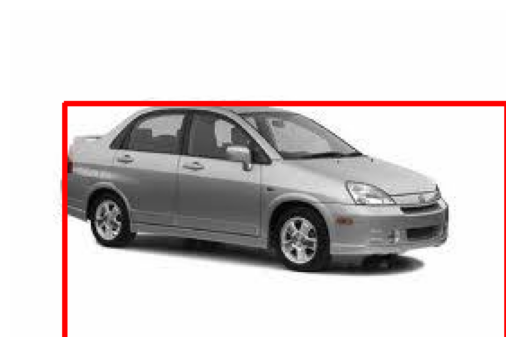

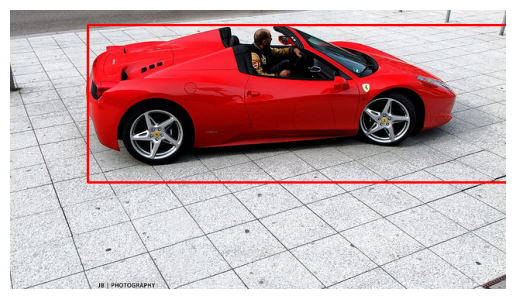

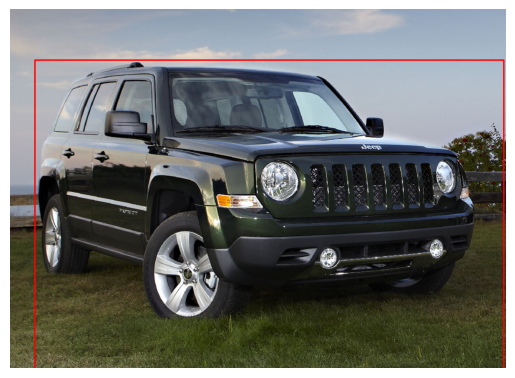

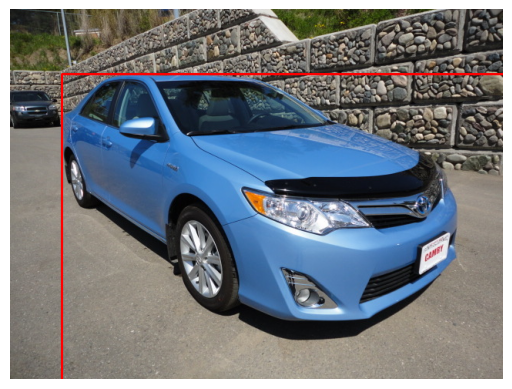

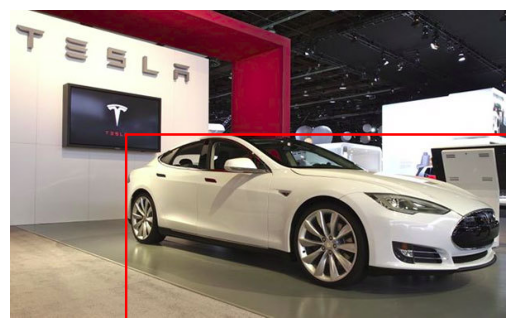

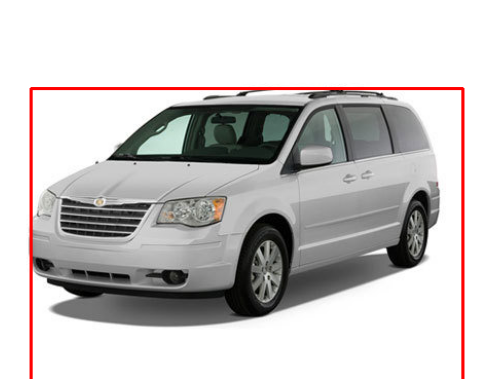

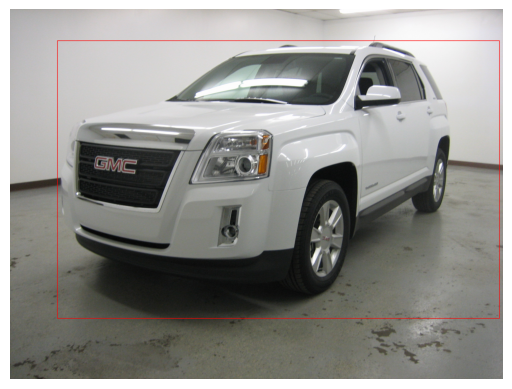

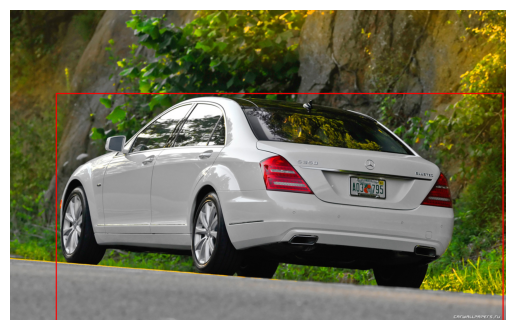

In [ ]:
# Create a mapping for testing images to their annotations
test_image_annotations_mapping = {}
for index, row in test_annotations_df.iterrows():
    image_name = row['Image Name']  # Use the actual column name
    x = row['Bounding Box coordinates']  # Assuming this is the x-coordinate
    y = row['Unnamed: 2']  # y-coordinate
    width = row['Unnamed: 3']  # width
    height = row['Unnamed: 4']  # height
    bounding_box = f"{x},{y},{width},{height}"  # Create a string in the format "x,y,width,height"
    test_image_annotations_mapping[image_name] = bounding_box

# Function to find the image path in subdirectories
def find_image_path(image_name, base_dir):
    for root, dirs, files in os.walk(base_dir):
        if image_name in files:
            return os.path.join(root, image_name)
    return None

# Function to draw bounding boxes on images
def display_image_with_bounding_box(image_path, bounding_box):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Parse the bounding box coordinates
    x, y, width, height = map(int, bounding_box.split(','))  # Adjust based on your bounding box format

    # Draw the bounding box
    cv2.rectangle(image, (x, y), (x + width, y + height), (255, 0, 0), 2)  # Red color box

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

# Display a few test images with bounding boxes
for i, (image_name, bounding_box) in enumerate(test_image_annotations_mapping.items()):
    image_path = find_image_path(image_name, os.path.join('Car_Images', 'Car Images', 'Test Images'))  # Search in subfolders
    if image_path:  # Check if the image was found
        display_image_with_bounding_box(image_path, bounding_box)
    else:
        print(f"Image not found: {image_name}")
    
    if i in range(7,11) :  # Display only the first 5 images
        break

In [39]:
# Define paths
image_dir = 'Car_Images/Car Images/Test Images'  # Adjust based on your directory structure

# Prepare data
images = []
labels = []

for index, row in test_annotations_df.iterrows():
    image_name = row['Image Name']
    #image_path = os.path.join(image_dir, image_name)
    image_path = find_image_path(image_name, os.path.join('Car_Images', 'Car Images', 'Test Images'))  # Search in subfolders
    
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (227, 227))  # Resize to 227x227 pixels (AlexNet input size)
    images.append(image)
    
    # Assuming 'Image class' contains the class label
    labels.append(row['Image class'])

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Encode labels
unique_classes = np.unique(labels)
label_to_index = {label: index for index, label in enumerate(unique_classes)}
indexed_labels = np.array([label_to_index[label] for label in labels])

# One-hot encode labels
indexed_labels = to_categorical(indexed_labels, num_classes=len(unique_classes))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, indexed_labels, test_size=0.2, random_state=42)

In [40]:
def create_alexnet_model(input_shape, num_classes):
    model = Sequential()
    
    # First Convolutional Layer
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())
    
    # Second Convolutional Layer
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())
    
    # Third Convolutional Layer
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    
    # Fourth Convolutional Layer
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    
    # Fifth Convolutional Layer
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())
    
    # Flatten the output
    model.add(Flatten())
    
    # Fully Connected Layers
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Create the model
input_shape = (227, 227, 3)  # Image dimensions for AlexNet
num_classes = len(unique_classes)
model = create_alexnet_model(input_shape, num_classes)

c:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# Data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True,
                             fill_mode='nearest')

# Fit the model
model.fit(datagen.flow(X_train, y_train, batch_size=32), 
          validation_data=(X_test, y_test), 
          epochs=20, 
          steps_per_epoch=len(X_train) // 32)

c:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 139s 676ms/step - accuracy: 0.0055 - loss: 6.3541 - val_accuracy: 0.0031 - val_loss: 5.2801
Epoch 2/20


c:\Python\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0031 - val_loss: 5.2801
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 129s 642ms/step - accuracy: 0.0055 - loss: 5.2771 - val_accuracy: 0.0025 - val_loss: 5.2829
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0025 - val_loss: 5.2829
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 124s 618ms/step - accuracy: 0.0054 - loss: 5.2760 - val_accuracy: 0.0093 - val_loss: 5.2850
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0093 - val_loss: 5.2850
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 179s 894ms/step - accuracy: 0.0066 - loss: 5.2766 - val_accuracy: 0.0093 - val_loss: 5.2881
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0093 - val_loss: 5.2881
Epoch 9/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0